In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(style="whitegrid")

In [13]:
# Loading jobs in data dataset
jobs = pd.read_csv("jobs_in_data.csv")
print(jobs.shape)   
jobs.head()

(9355, 12)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
# Preprocessing and creating derived features
jobs["work_year"] = jobs["work_year"].astype(int)
jobs["salary_in_usd"] = jobs["salary_in_usd"].astype(float)

jobs = jobs.dropna(subset=["salary_in_usd"])

jobs["job_category_clean"] = jobs["job_category"].str.strip()
jobs["experience_level_clean"] = jobs["experience_level"].str.strip()
jobs["work_setting_clean"] = jobs["work_setting"].str.strip()
jobs["company_size_clean"] = jobs["company_size"].str.strip()

jobs = jobs.copy()

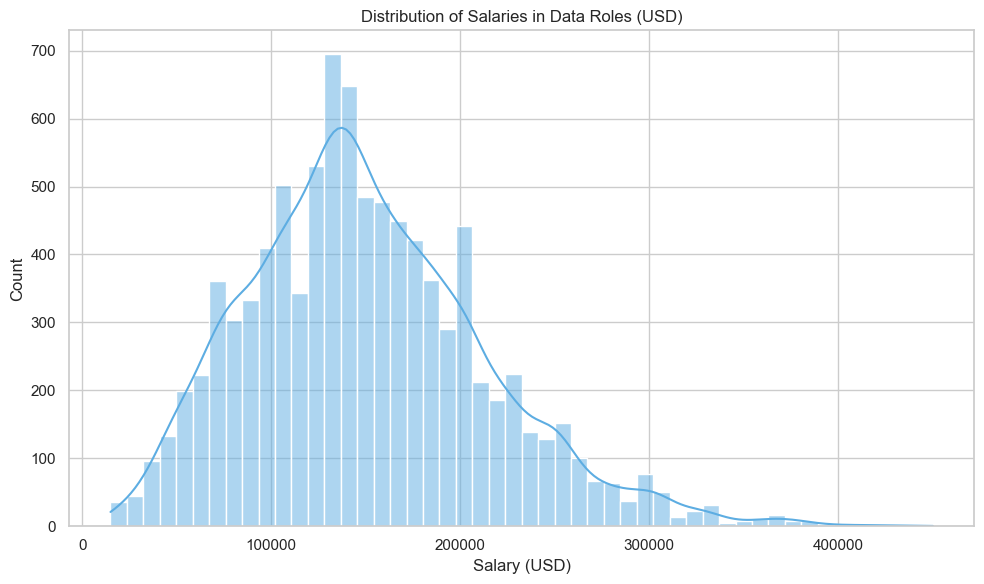

In [21]:
# Visualization 1: Distribution of salaries in USD
plt.figure(figsize=(10, 6))
sns.histplot(jobs["salary_in_usd"], bins=50, kde=True, color="#5DADE2")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.title("Distribution of Salaries in Data Roles (USD)")
plt.tight_layout()
plt.show()

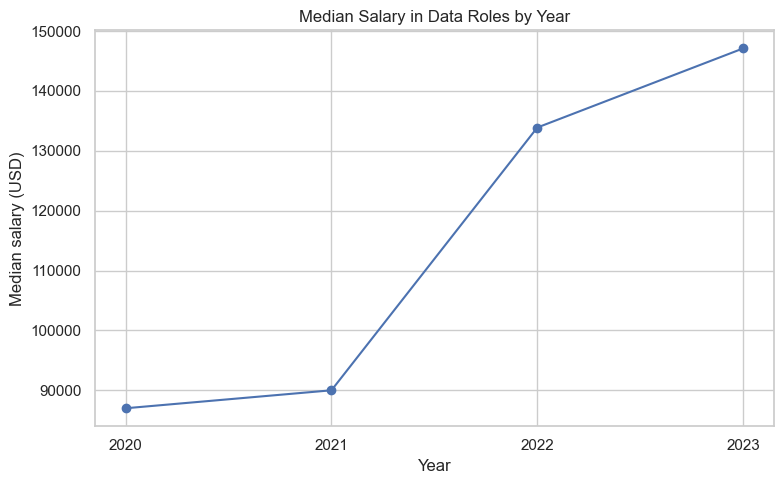

In [6]:
# Visualization 2: Median salary in USD by year
yearly_salary = (
    jobs.groupby("work_year", observed=False)["salary_in_usd"]
    .median()
    .reset_index()
)

plt.figure(figsize=(8, 5))
plt.plot(yearly_salary["work_year"], yearly_salary["salary_in_usd"], marker="o")
plt.xlabel("Year")
plt.ylabel("Median salary (USD)")
plt.title("Median Salary in Data Roles by Year")
plt.xticks(yearly_salary["work_year"])
plt.tight_layout()
plt.show()

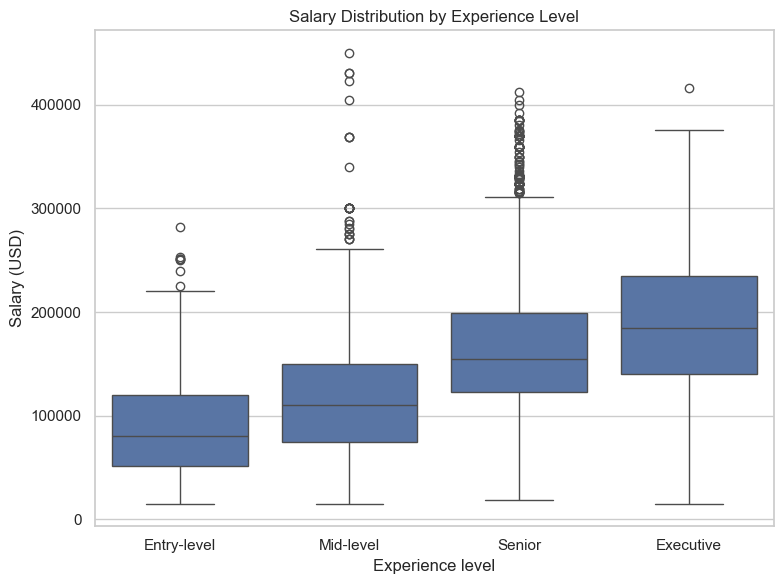

In [7]:
# Visualization 3: Salary distribution by experience level
exp_order = ["Entry-level", "Mid-level", "Senior", "Executive"]
jobs["experience_level_clean"] = pd.Categorical(jobs["experience_level_clean"], categories=exp_order, ordered=True)

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=jobs,
    x="experience_level_clean",
    y="salary_in_usd"
)
plt.xlabel("Experience level")
plt.ylabel("Salary (USD)")
plt.title("Salary Distribution by Experience Level")
plt.tight_layout()
plt.show()

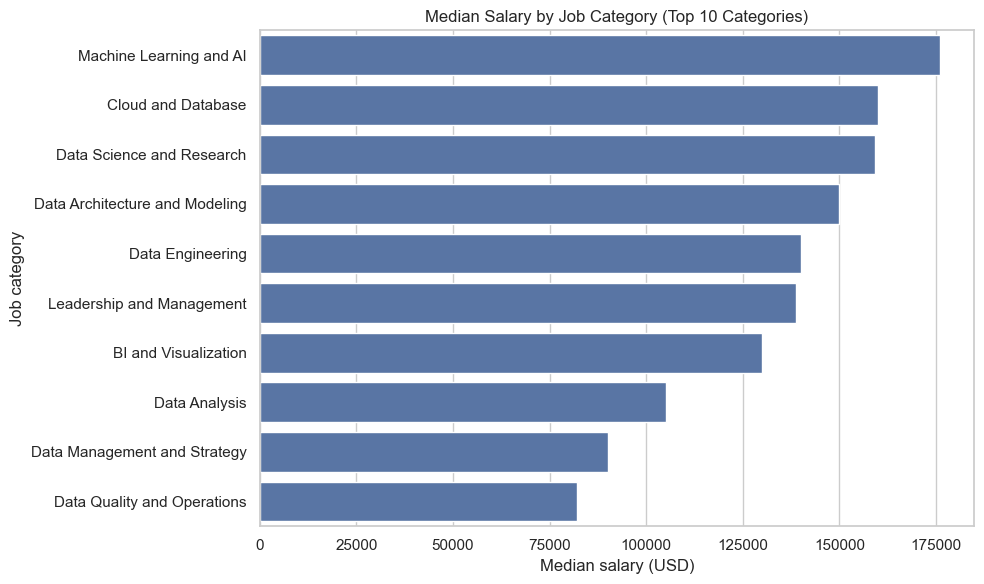

In [8]:
# Visualization 4: Median salary by job category (top 10)
category_counts = jobs["job_category_clean"].value_counts()
top_categories = category_counts.head(10).index.tolist()

cat_df = jobs[jobs["job_category_clean"].isin(top_categories)]

median_salary_by_category = (
    cat_df.groupby("job_category_clean", observed=False)["salary_in_usd"]
    .median()
    .reset_index()
    .sort_values("salary_in_usd", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=median_salary_by_category,
    x="salary_in_usd",
    y="job_category_clean",
    orient="h"
)
plt.xlabel("Median salary (USD)")
plt.ylabel("Job category")
plt.title("Median Salary by Job Category (Top 10 Categories)")
plt.tight_layout()
plt.show()

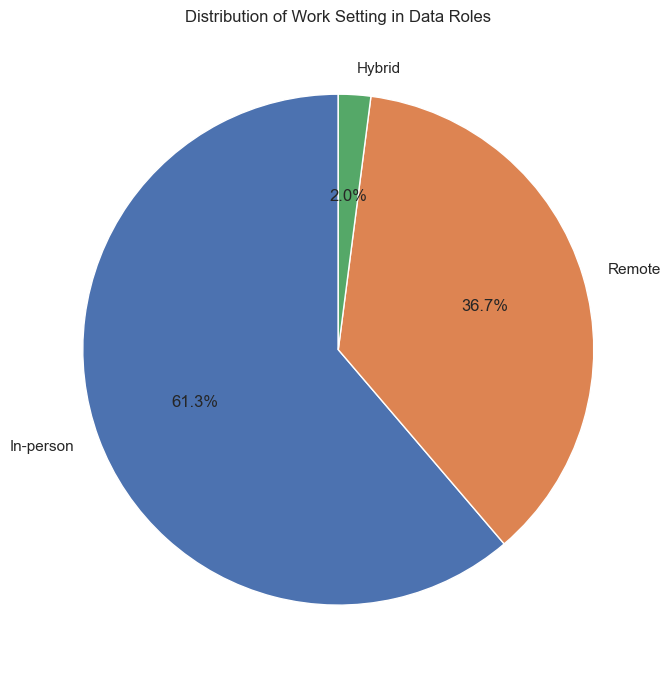

In [9]:
# Visualization 5: Distribution of work setting
setting_counts = jobs["work_setting_clean"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    setting_counts.values,
    labels=setting_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Work Setting in Data Roles")
plt.tight_layout()
plt.show()

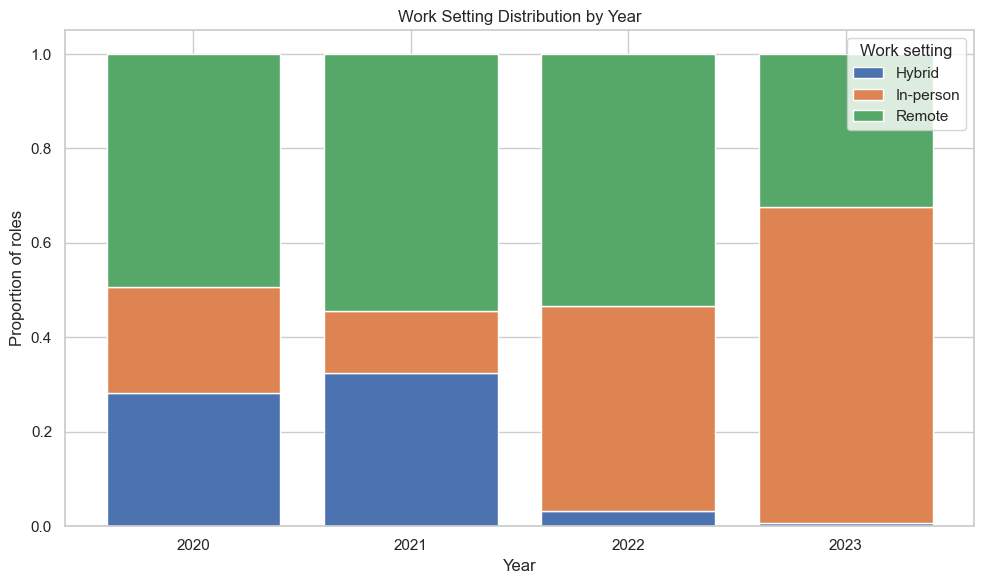

In [10]:
# Visualization 6: Work setting distribution by year
setting_year = (
    jobs.groupby(["work_year", "work_setting_clean"], observed=False)
    .size()
    .reset_index(name="count")
)

pivot_setting_year = setting_year.pivot(
    index="work_year",
    columns="work_setting_clean",
    values="count"
).fillna(0)

pivot_setting_year_norm = pivot_setting_year.div(pivot_setting_year.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
bottom = np.zeros(len(pivot_setting_year_norm))
for setting in pivot_setting_year_norm.columns:
    values = pivot_setting_year_norm[setting].values
    plt.bar(
        pivot_setting_year_norm.index.astype(str),
        values,
        bottom=bottom,
        label=setting
    )
    bottom += values

plt.xlabel("Year")
plt.ylabel("Proportion of roles")
plt.title("Work Setting Distribution by Year")
plt.legend(title="Work setting")
plt.tight_layout()
plt.show()

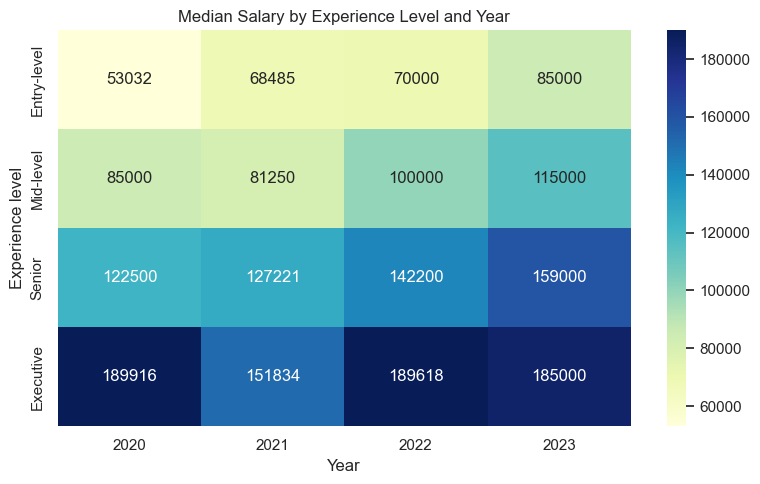

In [11]:
# Visualization 7: Median salary by experience level and year
heat_df = (
    jobs.groupby(["work_year", "experience_level_clean"], observed=False)["salary_in_usd"]
    .median()
    .reset_index()
    .dropna(subset=["experience_level_clean"])
)

pivot_heat = heat_df.pivot(
    index="experience_level_clean",
    columns="work_year",
    values="salary_in_usd"
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot_heat,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)
plt.xlabel("Year")
plt.ylabel("Experience level")
plt.title("Median Salary by Experience Level and Year")
plt.tight_layout()
plt.show()

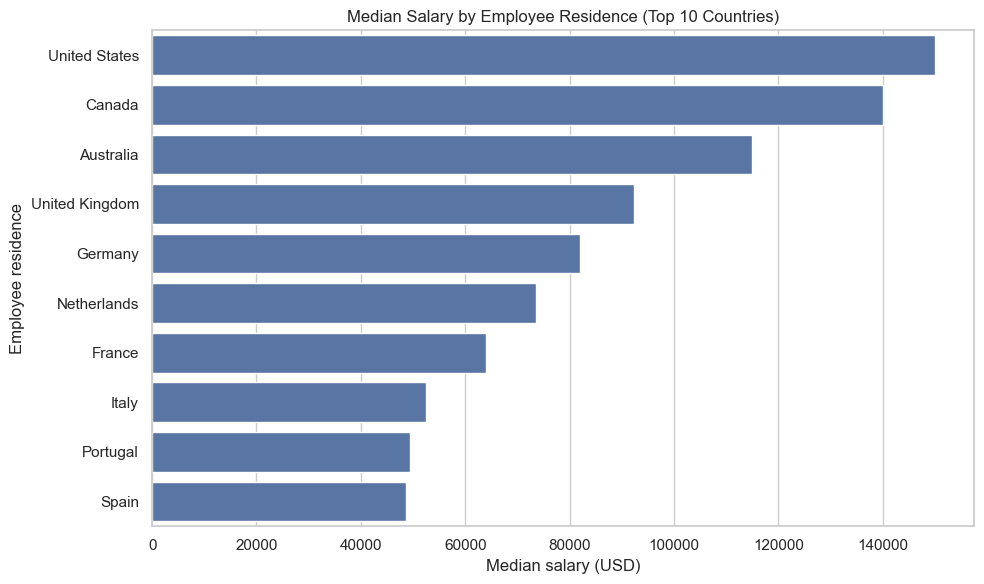

In [12]:
# Visualization 8: Median salary by employee residence (top 10)
country_counts = jobs["employee_residence"].value_counts()
top_countries = country_counts.head(10).index.tolist()

country_df = jobs[jobs["employee_residence"].isin(top_countries)]

median_salary_by_country = (
    country_df.groupby("employee_residence", observed=False)["salary_in_usd"]
    .median()
    .reset_index()
    .sort_values("salary_in_usd", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=median_salary_by_country,
    x="salary_in_usd",
    y="employee_residence",
    orient="h"
)
plt.xlabel("Median salary (USD)")
plt.ylabel("Employee residence")
plt.title("Median Salary by Employee Residence (Top 10 Countries)")
plt.tight_layout()
plt.show()

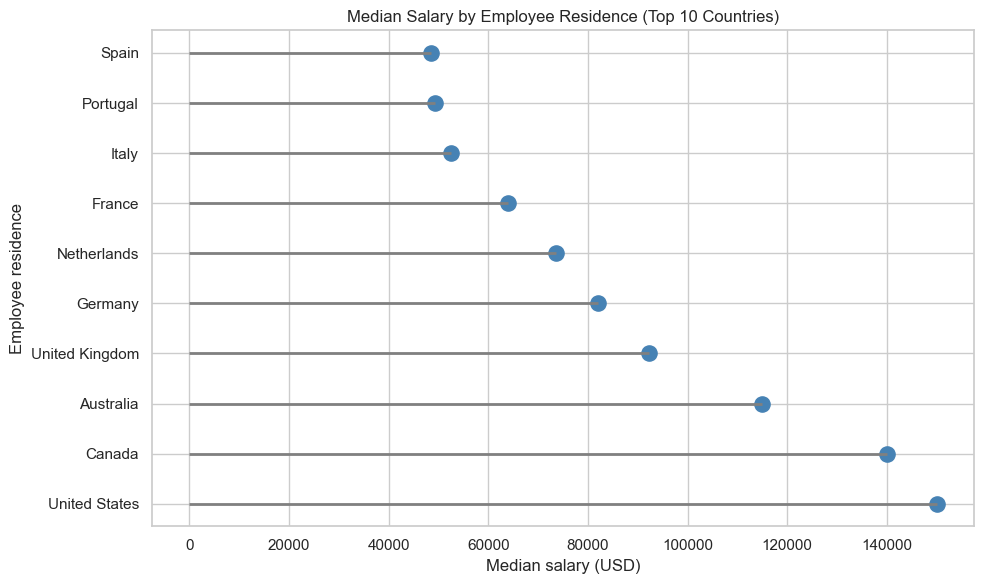

In [14]:
# Visualization: Lollipop chart for median salary by employee residence (Top 10)

plt.figure(figsize=(10, 6))

y = median_salary_by_country["employee_residence"]
x = median_salary_by_country["salary_in_usd"]

plt.hlines(y=y, xmin=0, xmax=x, color="gray", linewidth=2)
plt.scatter(x, y, color="steelblue", s=120)

plt.xlabel("Median salary (USD)")
plt.ylabel("Employee residence")
plt.title("Median Salary by Employee Residence (Top 10 Countries)")

plt.tight_layout()
plt.show()


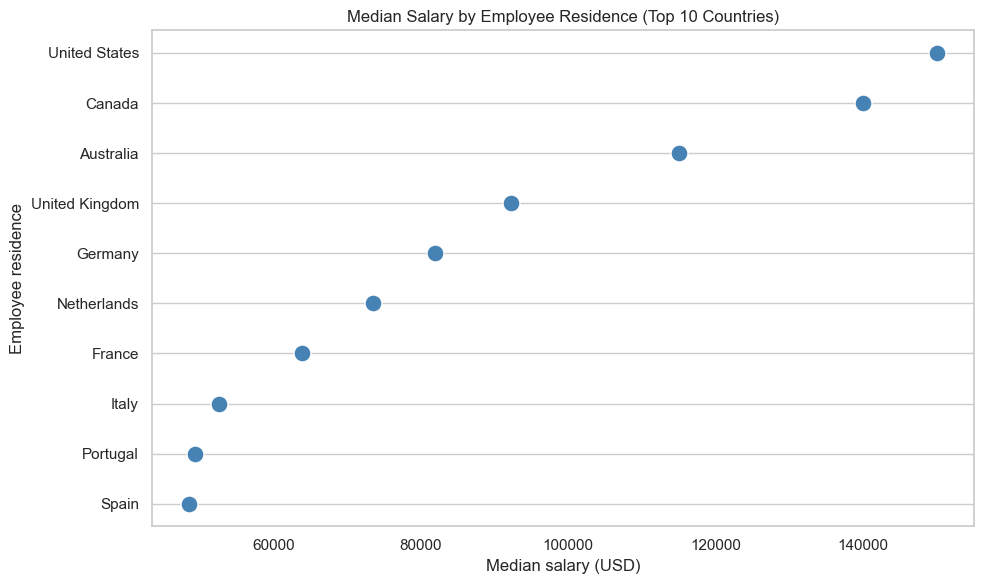

In [15]:
# Visualization: Dot plot for median salary by employee residence (Top 10)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=median_salary_by_country,
    x="salary_in_usd",
    y="employee_residence",
    s=150,
    color="steelblue"
)

plt.xlabel("Median salary (USD)")
plt.ylabel("Employee residence")
plt.title("Median Salary by Employee Residence (Top 10 Countries)")
plt.grid(axis="x")

plt.tight_layout()
plt.show()
